In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
import cv2
import imghdr

C:\Users\Shubh\AppData\Local\Temp\ipykernel_15204\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:

data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    print(image_class)

edible mushroom sporocarp
poisonous mushroom sporocarp


In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

### Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1572 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

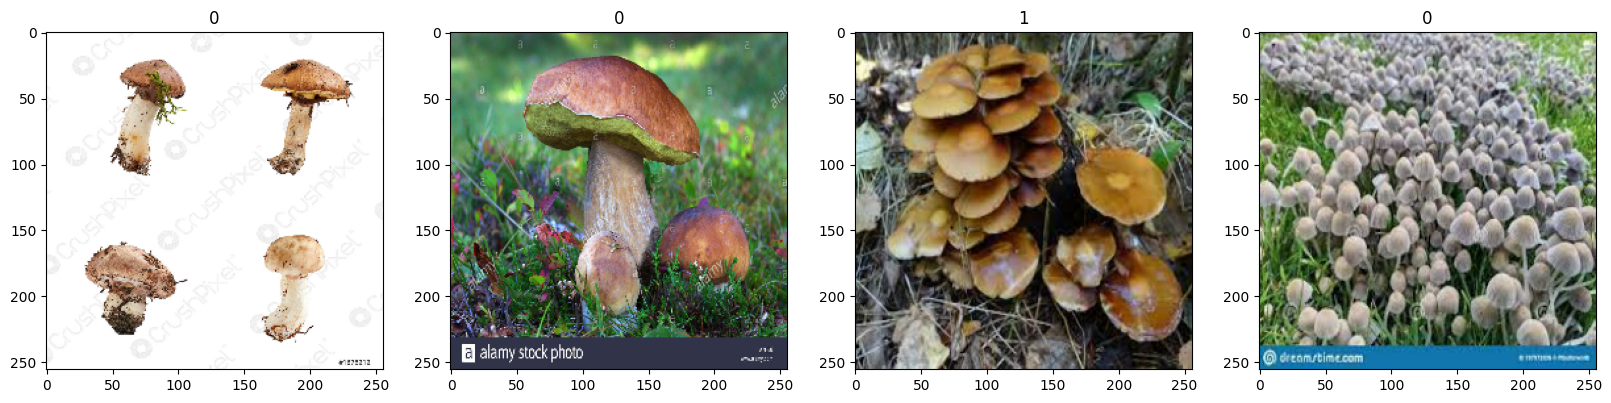

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 0 - Edible
## 1 - Poisonous

### Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))


In [16]:
data.as_numpy_iterator().next()

(array([[[[2.39430144e-02, 1.02374390e-01, 0.00000000e+00],
          [3.73621322e-02, 1.15793504e-01, 0.00000000e+00],
          [5.83486520e-02, 1.36780024e-01, 1.37867650e-03],
          ...,
          [2.54901975e-01, 3.56862754e-01, 1.73927695e-01],
          [3.00505519e-01, 3.95450354e-01, 2.07628682e-01],
          [2.94531256e-01, 3.88648897e-01, 1.92846194e-01]],
 
         [[6.91267401e-02, 1.52092427e-01, 2.04841159e-02],
          [7.74536133e-02, 1.60419300e-01, 2.31497977e-02],
          [9.03633833e-02, 1.73329070e-01, 2.77875122e-02],
          ...,
          [2.57443666e-01, 3.59404445e-01, 1.76469386e-01],
          [3.07067871e-01, 4.06068802e-01, 2.18247116e-01],
          [3.03520173e-01, 4.04359579e-01, 2.06369445e-01]],
 
         [[1.53365076e-01, 2.44296446e-01, 8.20415393e-02],
          [1.58976480e-01, 2.49907851e-01, 8.78985226e-02],
          [1.64541692e-01, 2.55473047e-01, 9.55465883e-02],
          ...,
          [2.69189686e-01, 3.71150464e-01, 1.8821

### Split Data

In [17]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size


35

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### DL Model

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

C:\Users\Shubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy']) 

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### Train

In [24]:
logdir = 'logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [26]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 26s 560ms/step - accuracy: 0.5772 - loss: 0.6923 - val_accuracy: 0.5312 - val_loss: 0.6651
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 404ms/step - accuracy: 0.6334 - loss: 0.6369 - val_accuracy: 0.6062 - val_loss: 0.6703
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 454ms/step - accuracy: 0.6831 - loss: 0.5874 - val_accuracy: 0.6656 - val_loss: 0.6243
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 407ms/step - accuracy: 0.7770 - loss: 0.4862 - val_accuracy: 0.6687 - val_loss: 0.5983
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 385ms/step - accuracy: 0.8255 - loss: 0.4040 - val_accuracy: 0.6438 - val_loss: 0.6959
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 391ms/step - accuracy: 0.8440 - loss: 0.3560 - val_accuracy: 0.6875 - val_loss: 0.6791
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 395ms/step - accuracy: 0.9199 - loss: 0.2268 - val_accuracy: 0.7281 - val_loss: 0.6173
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 403ms/step - accuracy: 0.9278 - loss: 0.1964 - val_accu

### Evaluation

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


In [30]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8550724387168884, Recall:0.8194444179534912, Accuracy: 0.8257575631141663


### Test

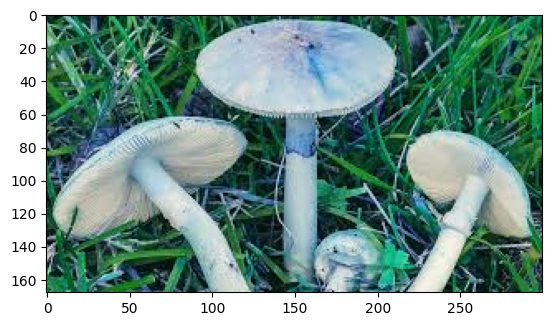

In [35]:
img = cv2.imread('test_poisonous.jpg')
plt.imshow(img)
plt.show()

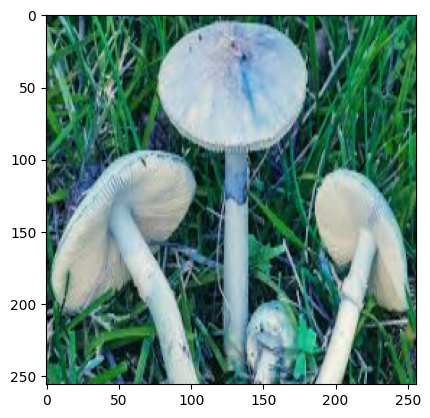

In [36]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [39]:
yhat

array([[0.7569634]], dtype=float32)

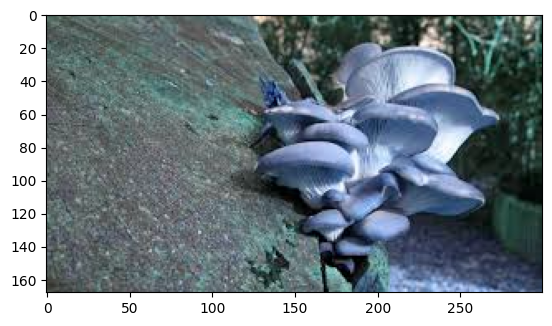

In [40]:
img = cv2.imread('test_Edible.jpg')
plt.imshow(img)
plt.show()

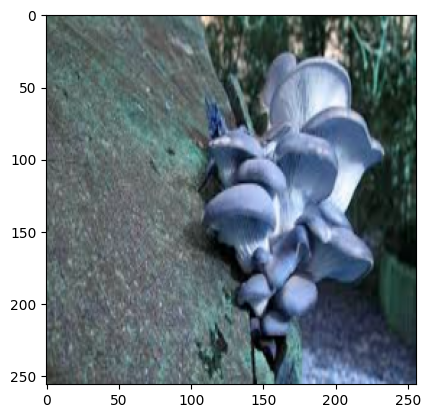

In [41]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [43]:
yhat

array([[0.79117125]], dtype=float32)